In [7]:
import cartopy.crs as ccrs  # pip install cartopy
import matplotlib.pyplot as plt
import netCDF4 as nc  # pip install netCDF4
import numpy as np
import wrf  # pip install wrf-python
from matplotlib.colors import BoundaryNorm
from matplotlib.colors import LinearSegmentedColormap

In [8]:
colors = [
    [0.43, 0.89, 1.0],
    [0.67, 0.94, 1.0],
    [1.0, 0.77, 0.89],
    [1.0, 0.6, 0.8],
    [1.0, 0.0, 1.0],
    [0.50, 0.0, 0.50],
    [0.0, 0.0, 0.50],
    [0.27, 0.27, 1.0],
    [0.2, 0.4, 1.0],
    [0.52, 0.64, 1.0],
    [1.0, 1.0, 1.0],  # URBAN IN ORIGINAL FILE
    [0.8, 0.8, 0.8],
    [0.70, 0.70, 0.70],
    [0.0, 0.0, 0.0],
    [0.6, 0.6, 0.6],
    [0.35, 0.35, 0.35],
    [0.50, 0.50, 0.0],
    [0.0, 0.36, 0.0],
    [0.0, 0.50, 0.0],
    [0.2, 0.6, 0.4],
    [0.62, 0.84, 0.0],
    [0.70, 0.70, 0.70],
    [0.70, 0.70, 0.70],
    [0.70, 0.70, 0.70],
    [0.70, 0.70, 0.70],
    [0.70, 0.70, 0.70],
    [0.70, 0.70, 0.70],
    [0.70, 0.70, 0.70],
    [0.70, 0.70, 0.70],
    [0.70, 0.70, 0.70],
    [0.70, 0.70, 0.70],
    [0.70, 0.70, 0.70],
    [0.83, 1.0, 0.35],
    [1.0, 1.0, 0.0],
    [1.0, 0.72, 0.44],
    [1.0, 0.6, 0.0],
    [1.0, 0.4, 0.0],
    [1.0, 0.0, 0.0],
    [0.64, 0.44, 1.0],
    [0.74, 0.29, 0.0],
    [0.67, 0.0, 0.22],
    [0.52, 0.0, 0.0],
]


cmap = LinearSegmentedColormap.from_list('luse', colors, N=41)
levels = np.arange(0, 41)
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

In [9]:
orig_file = nc.Dataset('/home/cdonnely/Urban-M4/experiments/2024-06-14_14-20-42/geo_em.d04.nc')
orig_var = wrf.getvar(orig_file, 'LU_INDEX')
lat, lon = wrf.latlon_coords(orig_var)
cart_proj = wrf.get_cartopy(orig_var)

w2w_file = nc.Dataset('/home/cdonnely/Urban-M4/experiments/2024-06-05_19-04-29/geo_em.d04.nc')
w2w_var = wrf.getvar(w2w_file, 'LU_INDEX')

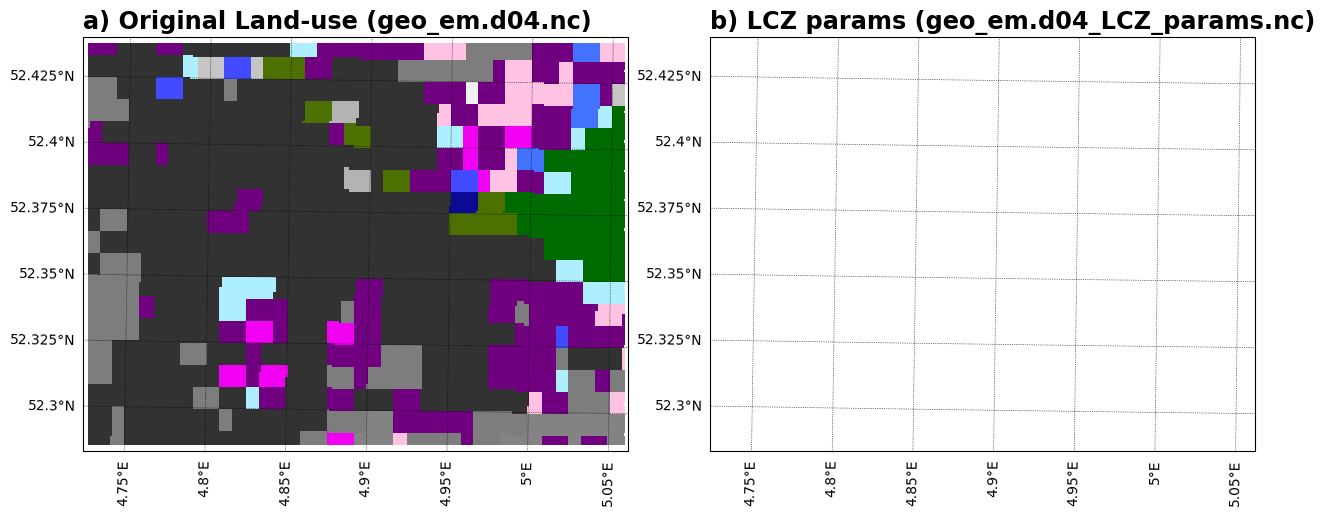

In [11]:
ax_options = {
    'color': 'black',
    'linestyle': 'dotted',
    'linewidth': 0.5,
    'zorder': 103,
    'draw_labels': True,
    'x_inline': False,
    'y_inline': False,
}
title_options = {
    'loc': 'left',
    'fontsize': 'xx-large',
    'fontweight': 'bold',
}
extent = [np.min(lon), np.max(lon), np.min(lat), np.max(lat)]

fig = plt.figure(figsize=(20, 16))
ax1 = fig.add_subplot(1, 3, 1, projection=cart_proj)
ax1.coastlines(linewidth=0.4, zorder=102, resolution='10m')
gl1 = ax1.gridlines(**ax_options)
gl1.right_labels = False
gl1.top_labels = False
ax1.set_extent(extent)
ct1 = ax1.pcolormesh(
    lon, lat, orig_var, cmap=cmap, norm=norm, transform=ccrs.PlateCarree()
)
ax1.set_title('a) Original Land-use (geo_em.d04.nc)', **title_options)

ax2 = fig.add_subplot(1, 3, 2, projection=cart_proj)
ax2.coastlines(linewidth=0.4, zorder=102, resolution='10m')
gl2 = ax2.gridlines(**ax_options)
gl2.right_labels = False
gl2.top_labels = False
ax2.set_extent(extent)
#ct2 = ax2.pcolormesh(
#    lon, lat, w2w_var, cmap=cmap, norm=norm, transform=ccrs.PlateCarree()
#)
ax2.set_title('b) LCZ params (geo_em.d04_LCZ_params.nc)', **title_options)

# ax3 = fig.add_subplot(1, 3, 3, projection=cart_proj)
# ax3.coastlines(linewidth=0.4, zorder=102, resolution='10m')
# gl3 = ax3.gridlines(**ax_options)
# gl3.right_labels = False
# gl3.top_labels = False
# ax3.set_extent(extent)
# ct3 = ax3.pcolormesh(
#     lon,
#     lat,
#     (w2w_var - orig_var) != 0,
#     cmap=cmap,
#     transform=ccrs.PlateCarree(),
#     zorder=101,
# )
# ax3.set_title('c) Pixels changed by w2w (original vs. param)', **title_options)

fig.subplots_adjust(
    left=0.05, right=0.95, top=0.95, bottom=0.18, wspace=0.15, hspace=0.15
)